In [2]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve,CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
f1_score)
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter(action = 'ignore',category = FutureWarning)

FileNotFoundError: Could not find module 'C:\Users\VEDIT\anaconda3\lib\site-packages\scipy\.libs\libbanded5x.EHDKC2XVYTQQ5MALRS6XN2CUSS6SRL6P.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [23]:
X,y = datasets.make_classification(n_samples = 100000,n_features = 20,n_informative = 2,n_redundant = 10,random_state = 42)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [73]:
def plot_calib(est,name,fig_index):
    """calibration curves"""
    
    isotonic = CalibratedClassifierCV(est,cv = 10,method = 'isotonic')
    
    sigmoid = CalibratedClassifierCV(est,cv = 10,method = 'sigmoid')
    lr  = LogisticRegression()
    
    fig = plt.figure(fig_index,figsize = (10,10))
    ax1 = plt.subplot2grid((3,1),(0,0),rowspan = 2)
    ax2 = plt.subplot2grid((3,1),(2,0))
    ax1.plot([0,1],[0,1],"k:",label = 'perfectly calibrated ')
    for clf,name in [(lr,'lr'),(est,name),(isotonic,name+'isotonic'),(sigmoid,name+'sigmoid')]:
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf,'predict_proba'):
            prob_pos = clf.predict_proba(X_test)[:,1]
        else :
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max() - prob_pos.min())
        clf_score = brier_score_loss(y_test,prob_pos,pos_label = y.max())
            
        print("\t name %s"%name)
        print("\t Brier score %1.3f"%clf_score)
        print("\t precission %1.3f" %precision_score(y_pred,y_test))
        print("\t f1_score %1.3f"%f1_score(y_pred,y_test))
        print("\t recall %1.3f\n"%recall_score(y_test,y_pred))
        
        fraction_of_positives,mean_predicted_value = calibration_curve(y_test,prob_pos,n_bins = 10)
        ax1.plot(fraction_of_positives,mean_predicted_value,'s-',label = "%s,%1.3f"%(name,clf_score))
        ax2.hist(prob_pos,range(0,1),label = name,histtype = 'step',lw = 2)
    
    ax1.set_title("Calibration curves(reliability curves")
    ax1.set_ylabel("fraction of positive")
    ax1.set_xlabel("mean predicted values")
    ax1.set_ylim([-0.5,1.05])
    ax1.legend(loc = 'lower right')
    ax2.set_title("")
    ax2.set_xlabel("mean predicted value")
    ax2.set_ylabel("count")
    ax2.legend(loc = 'upper center',ncol = 2)
    plt.tight_layout()
    
        
              

	 name lr
	 Brier score 0.094
	 precission 0.870
	 f1_score 0.870
	 recall 0.870

	 name gaussian nb
	 Brier score 0.113
	 precission 0.879
	 f1_score 0.871
	 recall 0.879

	 name gaussian nbisotonic
	 Brier score 0.093
	 precission 0.874
	 f1_score 0.870
	 recall 0.874

	 name gaussian nbsigmoid
	 Brier score 0.106
	 precission 0.878
	 f1_score 0.871
	 recall 0.878

	 name lr
	 Brier score 0.094
	 precission 0.870
	 f1_score 0.870
	 recall 0.870

	 name linear svc
	 Brier score 0.157
	 precission 0.870
	 f1_score 0.870
	 recall 0.870

	 name linear svcisotonic
	 Brier score 0.094
	 precission 0.872
	 f1_score 0.871
	 recall 0.872

	 name linear svcsigmoid
	 Brier score 0.094
	 precission 0.870
	 f1_score 0.870
	 recall 0.870



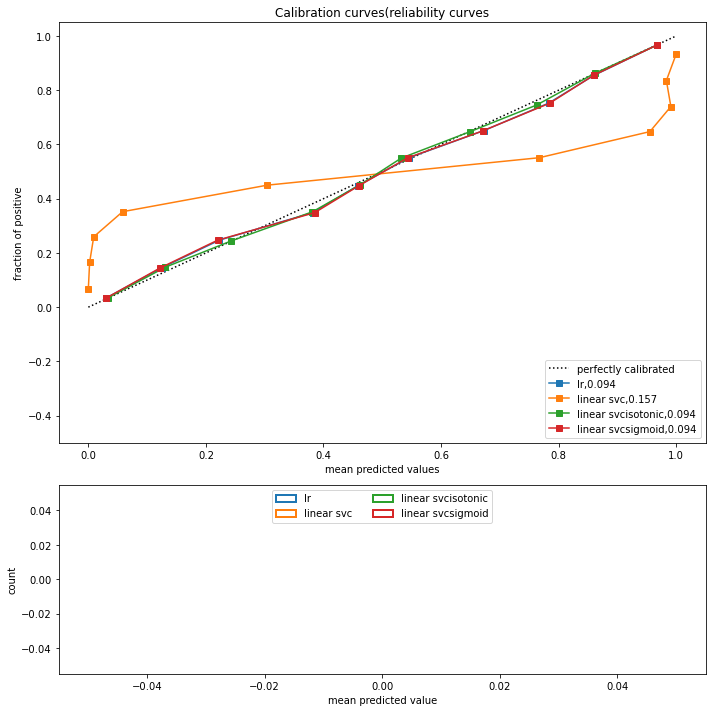

In [78]:
plot_calib(GaussianNB(),'gaussian nb',1)
plot_calib(LinearSVC(max_iter = 10000),'linear svc',1)